# **Analysing the wheat production**

---



Um pequeno resumo:

O Egito é o país que mais importa trigo em mil dólares americanos (valores até 2019 o que representa 3,92% das importações mundiais.Seguido por Indonésia Turquia, Filipinas e Itália.

Nesta análise focamos nos países:  


Australia, Brazil, Canada, Egypt, India, Indonesia, Philippines, Russian,Turkey, United Kingdom, United States of America , Germany,France e China. 

In [ ]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

## Reading CSV
---

In [ ]:

file_path ='/content/drive/MyDrive/Data_Lake/wheat_importation/'
file = 'wheat_importation.csv'

Reading encoding

In [ ]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

Reading CSV

In [ ]:
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as wheat_importation:
  df_wheat_importation = pd.read_csv(wheat_importation)


# Dataframe

### Na análise da importação do trigo foi possível puxar todos o países, não deu erro na API

In [ ]:
df_wheat_importation

,Country,Armenia,Australia,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,CÃ´te d'Ivoire,Kazakhstan,Jamaica,Austria,Japan,Jordan,Kyrgyzstan,Kenya,Cambodia,Democratic People's Republic of Korea,Republic of Korea,Kuwait,Latvia,Bahamas,Lao People's Democratic Republic,Lebanon,Lesotho,Liberia,Libya,Lithuania,"China, Macao SAR",Madagascar,Bahrain,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,...,Azerbaijan,Benin,Denmark,Dominica,Oceania,Micronesia,Dominican Republic,Belarus,Ecuador,Egypt,El Salvador,Equatorial Guinea,Ethiopia PDR,Estonia,Falkland Islands (Malvinas),Fiji,Finland,France,Angola,Djibouti,Georgia,Gabon,Gambia,Germany,Antigua and Barbuda,Bosnia and Herzegovina,Ghana,Kiribati,Greece,Grenada,Guatemala,Argentina,Guinea,Guyana,Haiti,Honduras,"China, Hong Kong SAR",Hungary,Croatia,Iceland
0,Item,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,...,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat
1,Element,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,...,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value,Import Value
2,Frequency,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A
3,1961-01-01,0.0,0.0,246460.0,0.0,9670.0,27960.0,18764.0,24120.0,169191.0,0.0,NaN,52.0,4040.0,179440.0,4310.0,0.0,960.0,0.0,23200.0,24019.0,113.0,0.0,0.0,0.0,9180.0,0.0,1.0,860.0,0.0,5.0,3.0,20.0,10.0,1285.0,0.0,0.0,3812.0,0.0,2.0,...,0.0,50.0,1800.0,NaN,9498.0,2.0,2210.0,0.0,3400.0,41480.0,2240.0,NaN,0.0,0.0,NaN,6.0,9300.0,48800.0,1950.0,0.0,0.0,0.0,0.0,285390.0,0.0,NaN,0.0,0.0,2190.0,0.0,4338.0,0.0,NaN,0.0,2284.0,980.0,6050.0,30040.0,0.0,80.0
4,1962-01-01,0.0,0.0,262213.0,0.0,2840.0,0.0,10194.0,22350.0,35794.0,0.0,NaN,125.0,6120.0,180944.0,750.0,0.0,4050.0,0.0,6360.0,26050.0,113.0,0.0,0.0,0.0,14610.0,0.0,0.0,1090.0,0.0,20.0,20.0,30.0,10.0,1433.0,0.0,0.0,3527.0,0.0,2.0,...,0.0,10.0,1070.0,NaN,11284.0,2.0,3360.0,0.0,2890.0,60270.0,2360.0,NaN,79.0,0.0,NaN,8.0,14450.0,50950.0,1940.0,0.0,0.0,0.0,0.0,314840.0,0.0,NaN,1.0,0.0,140.0,1.0,4117.0,0.0,NaN,0.0,3605.0,1150.0,7820.0,11365.0,0.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2015-01-01,70621.0,740.0,135033.0,2082768.0,766080.0,136400.0,29150.0,338876.0,2032143.0,159093.0,12945.0,49440.0,187221.0,1652510.0,210494.0,61538.0,332465.0,8203.0,73000.0,1105863.0,98658.0,47536.0,36.0,NaN,142564.0,4513.0,10573.0,2

###Renomeando as colunas e dropando níveis desnecessários
---

In [ ]:
def replace (col): 
    return col.replace("-01-01",'')

In [ ]:
df_wheat_importation.shape

(62, 194)

In [ ]:
anos = {"Country":"Years"}
df_wheat_importation=\
(
    df_wheat_importation.drop(range(0,3))
    .rename(columns=anos)
    .set_index("Years")
    .rename(index=replace)
 )


In [ ]:
##verificando tamanho do arquivo
df_wheat_importation.shape

(59, 193)

Verificando países listados

---

In [ ]:
df_wheat_importation.columns.to_list()

['Armenia',
 'Australia',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 "CÃ´te d'Ivoire",
 'Kazakhstan',
 'Jamaica',
 'Austria',
 'Japan',
 'Jordan',
 'Kyrgyzstan',
 'Kenya',
 'Cambodia',
 "Democratic People's Republic of Korea",
 'Republic of Korea',
 'Kuwait',
 'Latvia',
 'Bahamas',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'China, Macao SAR',
 'Madagascar',
 'Bahrain',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Barbados',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Republic of Moldova',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'North Macedonia',
 'Vanuatu',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Bangladesh',
 'Norway',
 'Pakistan',
 'Panama',
 'Czechia',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Guinea-Bissau',
 'Timor-Leste',
 'Eritrea',
 'Qatar',
 'Bhutan',


Note que a China aparece de 4 maneiras diferentes, 
* China, Hong Kong SAR 
* China, Macao SAR
* China Mainland
* China ,Twiwan Province of

---


In [ ]:
paises_selecionados = ["Australia","Brazil","Canada","Egypt","India","Indonesia","Philippines","Russian Federation","Turkey","United Kingdom","United States of America","Germany","France","China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"]

In [ ]:
df_countries_importation= df_wheat_importation[paises_selecionados]

In [ ]:
df_countries_importation

,Australia,Brazil,Canada,Egypt,India,Indonesia,Philippines,Russian Federation,Turkey,United Kingdom,United States of America,Germany,France,"China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland"
Years,,,,,,,,,,,,,,,,,
1961,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0
1962,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0
1963,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0
1964,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0
1965,0.0,135900.0,0.0,89780.0,480440.0,0.0,28638.0,0.0,26210.0,320522.0,1631.0,196970.0,52500.0,6490.0,30.0,27870.0,455000.0
1966,0.0,169891.0,0.0,98454.0,609293.0,0.0,27193.0,0.0,17222.0,302044.0,2786.0,215639.0,57400.0,7799.0,13.0,21025.0,466000.0
1967,0.0,180767.0,0.0,126580.0,549425.0,0.0,33631.0,0.0,1954.0,287031.0,844.0,233179.0,51609.0,9570.0,21.0,21883.0,339000.0
1968,0.0,182615.0,0.0,95269.0,367996.0,0.0,31346.0,0.0,1.0,282757.0,1094.0,220441.0,37403.0,11485.0,2.0,32210.0,334000.0
1969,0.0,161963.0,0.0,73460.0,257261.0,0.0,40180.0,0.0,26730.0,317542.0,2590.0,312809.0,45421.0,9298.0,25.0,45994.0,247000.0


Identificando valores NA

---

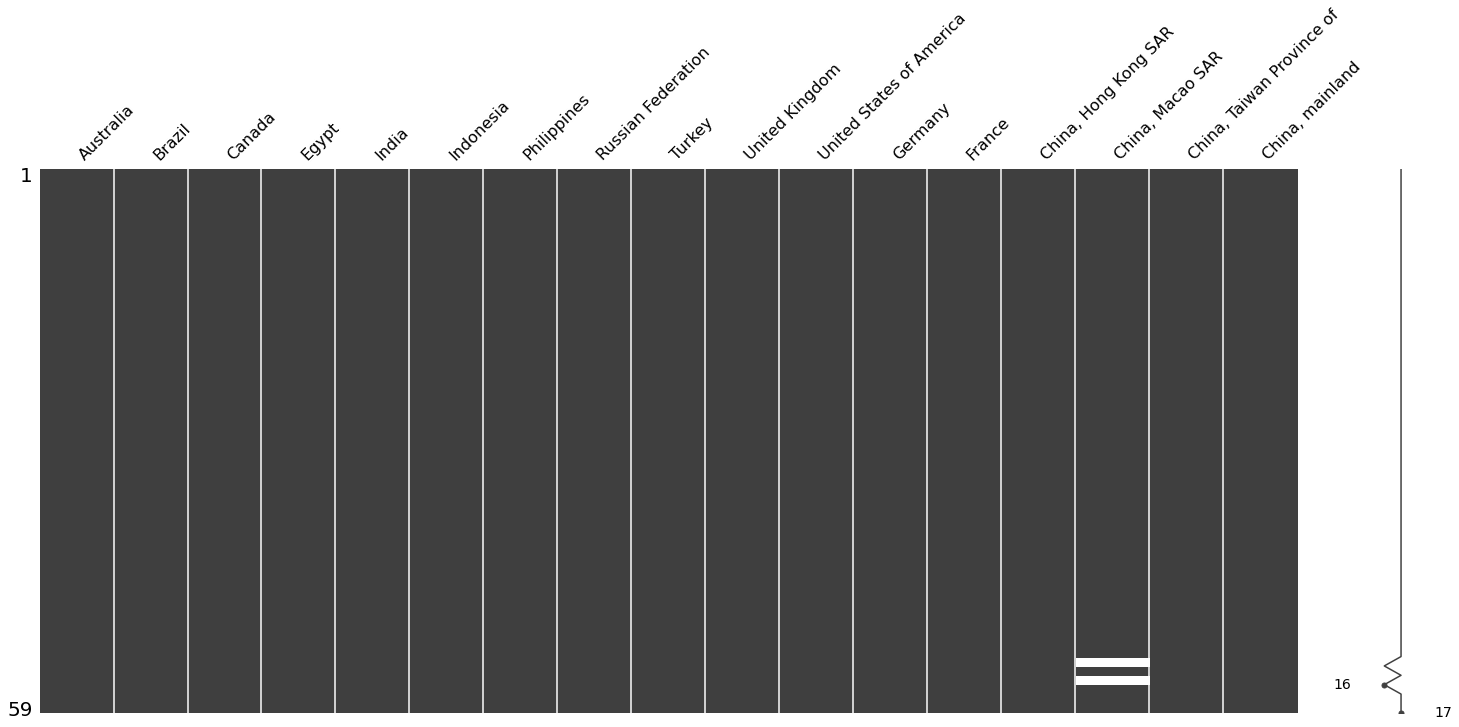

In [ ]:
msno.matrix(df_countries_importation)

In [ ]:
#replacing name for ISO3 cod
iso3 = {'Australia' :"AUS", 'Brazil':"BRA", 'Canada':"CAN", 'China':"CHN", 'Egypt':"EGY", 'India':"IND", 'Indonesia':"IDN",
       'Philippines':"PHL", 'Russia':"RUS", 'Turkey':"TUR", 'United Kingdom':"GBR", 'United States':"USA",'United States of America':"USA","France":"FRA","Russian Federation":"RUS","China, Hong Kong SAR":"HKG","China, Macao SAR":"MAC",'China, Taiwan Province of':"TWN",'China, mainland':"CHN","Germany":"DEU"}

df_countries_importation_iso3=df_countries_importation.rename(columns=iso3)
df_countries_importation_iso3.head()

,AUS,BRA,CAN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA,DEU,FRA,HKG,MAC,TWN,CHN
Years,,,,,,,,,,,,,,,,,
1961,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0
1962,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0
1963,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0
1964,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0
1965,0.0,135900.0,0.0,89780.0,480440.0,0.0,28638.0,0.0,26210.0,320522.0,1631.0,196970.0,52500.0,6490.0,30.0,27870.0,455000.0


In [ ]:
df_countries_importation_iso3.isna().sum()

AUS    0
BRA    0
CAN    0
EGY    0
IND    0
IDN    0
PHL    0
RUS    0
TUR    0
GBR    0
USA    0
DEU    0
FRA    0
HKG    0
MAC    2
TWN    0
CHN    0
dtype: int64

Identificando tipo de dados

---

In [ ]:
df_countries_importation_iso3.dtypes

AUS    object
BRA    object
CAN    object
EGY    object
IND    object
IDN    object
PHL    object
RUS    object
TUR    object
GBR    object
USA    object
DEU    object
FRA    object
HKG    object
MAC    object
TWN    object
CHN    object
dtype: object

Alterando tipo de dados

---

In [ ]:
#fillna and changing types
df_countries_importation_iso3 =\
(
    df_countries_importation_iso3.fillna(0)
    .astype(float)
    
   
)



In [ ]:
df_countries_importation_iso3

,AUS,BRA,CAN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA,DEU,FRA,HKG,MAC,TWN,CHN
Years,,,,,,,,,,,,,,,,,
1961,0.0,138890.0,10.0,41480.0,246460.0,0.0,16860.0,0.0,62190.0,282630.0,11490.0,285390.0,48800.0,6050.0,5.0,19410.0,283000.0
1962,0.0,160950.0,20.0,60270.0,262213.0,0.0,22740.0,0.0,50650.0,291561.0,8280.0,314840.0,50950.0,7820.0,20.0,19220.0,268000.0
1963,0.0,164000.0,0.0,72270.0,303301.0,0.0,27265.0,0.0,57820.0,289730.0,9310.0,201720.0,53370.0,5850.0,120.0,27770.0,419000.0
1964,0.0,209560.0,0.0,70090.0,447432.0,0.0,23640.0,0.0,6130.0,288580.0,5704.0,220140.0,51870.0,7010.0,50.0,23620.0,424000.0
1965,0.0,135900.0,0.0,89780.0,480440.0,0.0,28638.0,0.0,26210.0,320522.0,1631.0,196970.0,52500.0,6490.0,30.0,27870.0,455000.0
1966,0.0,169891.0,0.0,98454.0,609293.0,0.0,27193.0,0.0,17222.0,302044.0,2786.0,215639.0,57400.0,7799.0,13.0,21025.0,466000.0
1967,0.0,180767.0,0.0,126580.0,549425.0,0.0,33631.0,0.0,1954.0,287031.0,844.0,233179.0,51609.0,9570.0,21.0,21883.0,339000.0
1968,0.0,182615.0,0.0,95269.0,367996.0,0.0,31346.0,0.0,1.0,282757.0,1094.0,220441.0,37403.0,11485.0,2.0,32210.0,334000.0
1969,0.0,161963.0,0.0,73460.0,257261.0,0.0,40180.0,0.0,26730.0,317542.0,2590.0,312809.0,45421.0,9298.0,25.0,45994.0,247000.0


In [ ]:
#checking the usage and type
df_countries_importation_iso3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1961 to 2019
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUS     59 non-null     float64
 1   BRA     59 non-null     float64
 2   CAN     59 non-null     float64
 3   EGY     59 non-null     float64
 4   IND     59 non-null     float64
 5   IDN     59 non-null     float64
 6   PHL     59 non-null     float64
 7   RUS     59 non-null     float64
 8   TUR     59 non-null     float64
 9   GBR     59 non-null     float64
 10  USA     59 non-null     float64
 11  DEU     59 non-null     float64
 12  FRA     59 non-null     float64
 13  HKG     59 non-null     float64
 14  MAC     59 non-null     float64
 15  TWN     59 non-null     float64
 16  CHN     59 non-null     float64
dtypes: float64(17)
memory usage: 8.3+ KB


Contando valores zerados

---

In [ ]:
counting_zeros= (df_countries_importation_iso3.reset_index().eq(0).sum())
counting_zeros

Years     0
AUS      29
BRA       0
CAN      24
EGY       0
IND       1
IDN       9
PHL       0
RUS      30
TUR       3
GBR       0
USA       0
DEU       0
FRA       0
HKG       0
MAC      21
TWN       0
CHN       0
dtype: int64

*DADOS ESTATÍSTICOS*

---

In [ ]:
estatistica = \
(
    df_countries_importation_iso3.describe(include=[np.number])
    .T
    .sort_values('max',ascending=False)

)
estatistica

,count,mean,std,min,25%,50%,75%,max
RUS,59.0,1.824350e+05,602787.181864,0.0,0.0,0.0,93015.5,3860000.0
EGY,59.0,1.039936e+06,963408.066162,41480.0,482500.0,763795.0,1157012.0,3689027.0
IDN,59.0,7.094945e+05,892976.847131,0.0,69095.5,333645.0,828560.5,3627763.0
CHN,59.0,9.216215e+05,766804.204591,7330.0,321551.5,780899.0,1410961.5,2882227.0
BRA,59.0,7.882273e+05,552959.591907,111049.0,286929.5,813919.0,1091916.0,2414821.0
TUR,59.0,3.497203e+05,521982.970110,0.0,23591.0,97897.0,422122.0,2302225.0
PHL,59.0,3.741868e+05,408806.832835,16860.0,93117.5,229664.0,442708.0,1847093.0
IND,59.0,2.573442e+05,347676.079128,0.0,8406.5,135033.0,301064.5,1404336.0
DEU,59.0,4.730109e+05,300790.746112,129082.0,250224.5,404603.0,567262.5,1394659.0
USA,59.0,2.369870e+05,308022.498351,120.0,4135.0,69619.0,315284.5,1099796.0


In [ ]:
path_to_charts='/content/drive/MyDrive/Trigo_analises/charts/'


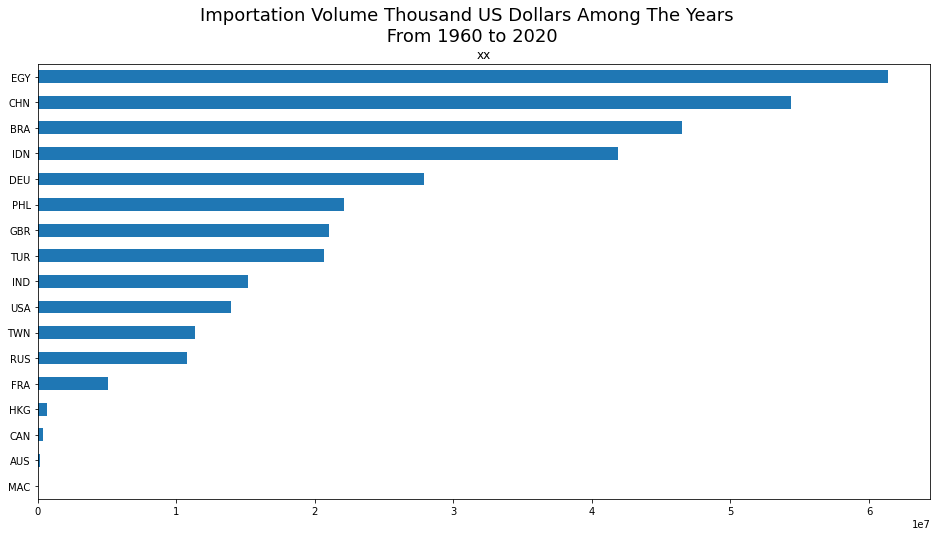

In [ ]:
fig, ax_array = plt.subplots(1,1, figsize = (16,8))
ax1= ax_array
fig.suptitle("Importation Volume Thousand US Dollars Among The Years \n From 1960 to 2020", size=18)
ex_1 = df_countries_importation_iso3.sum().sort_values(ascending= True)
ex_1.plot.barh(ax=ax1, title= "xx")
fig.savefig(f'{path_to_charts}Importation Volume Thousand US Dollars From 1960 to 2020.png', dpi=300,)

## ***The Top Importer of each Year***

In [ ]:
tops_for_year_importation=\
(
    df_countries_importation_iso3.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Importatoin ($)")
    .sort_values(["Years","Importatoin ($)"], ascending= [True,False])
    .drop_duplicates(subset="Years")
    .set_index("Years")
    
    
)
tops_for_year_importation

,Countries,Importatoin ($)
Years,,
1961,DEU,285390.0
1962,DEU,314840.0
1963,CHN,419000.0
1964,IND,447432.0
1965,IND,480440.0
1966,IND,609293.0
1967,IND,549425.0
1968,IND,367996.0
1969,GBR,317542.0


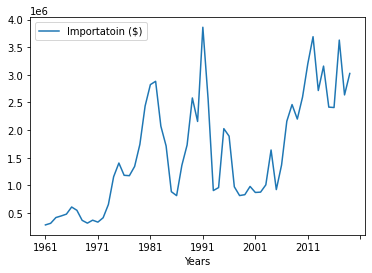

In [ ]:
tops_for_year_importation.plot()

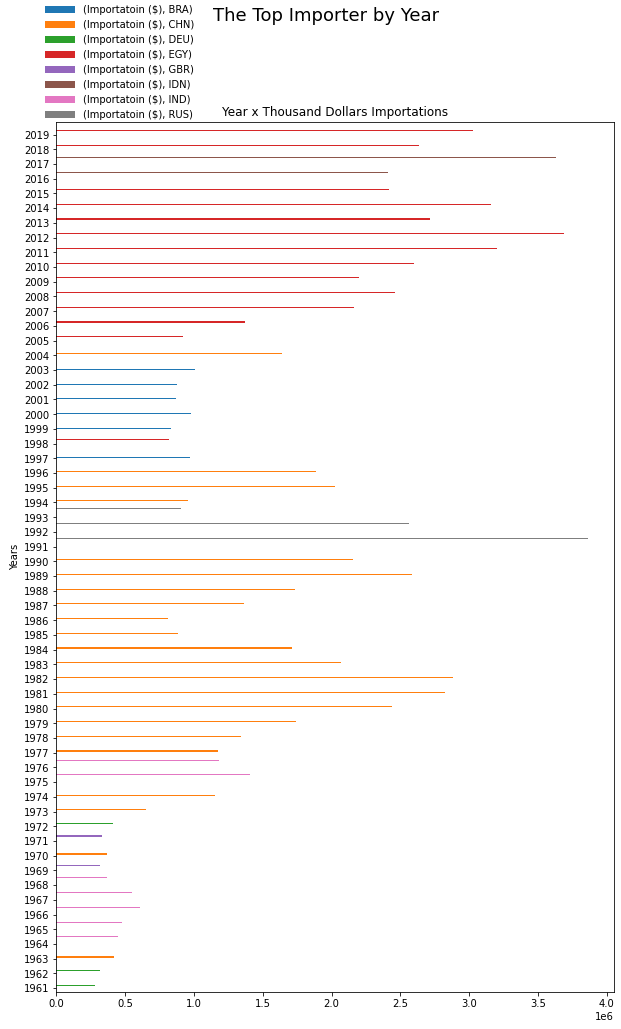

In [ ]:
#Plotting the Biggest Producer by Year
fig, ax_array2 = plt.subplots(1,1, figsize = (10,16))
ax2= ax_array2
fig.suptitle("The Top Importer by Year", size=18)
ex_2 = tops_for_year_importation.pivot(columns= 'Countries')
ex_2.plot.barh(ax=ax2, title= "Year x Thousand Dollars Importations",legend=False,width=0.60, align='edge')
ax2.figure.legend(framealpha=1, frameon=False, title ="Type - Country", handlelength=3.0, handletextpad= 0.8,loc='upper left',bbox_to_anchor=(0.05, 0.91))
#fig.savefig(f"{path_to_charts}The Top Importer by Year.png",dpi=300)

## ***The last placed importer at each year***

---

Identificando países que tem valores zerados para que não ocorra empate com o zeros

In [ ]:
counting_no_zeros=df_countries_importation_iso3.reset_index().astype(bool).sum(axis=0.0)
counting_no_zeros



Years    59
AUS      30
BRA      59
CAN      35
EGY      59
IND      58
IDN      50
PHL      59
RUS      29
TUR      56
GBR      59
USA      59
DEU      59
FRA      59
HKG      59
MAC      38
TWN      59
CHN      59
dtype: int64

In [ ]:
last_for_years_importation=\
(
    
    df_countries_importation_iso3.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Importatoin ($)")
    .sort_values(["Years","Importatoin ($)"], ascending= [True,True])
    
  )
    
last_for_years_importation

              




,Years,Countries,Importatoin ($)
0,1961,AUS,0.0
295,1961,IDN,0.0
413,1961,RUS,0.0
826,1961,MAC,5.0
118,1961,CAN,10.0
...,...,...,...
117,2019,BRA,1491220.0
412,2019,PHL,1847093.0
530,2019,TUR,2302225.0
353,2019,IDN,2799261.0


Os países com valores zerados foram excluídos da análise para que não ocorresse empate de últimos colocados em relação ao valor da importação

In [ ]:
last_for_years_importation=\
(
    last_for_years_importation.loc[last_for_years_importation["Importatoin ($)"]>0,:]
    #drop duplicates
    .drop_duplicates(subset="Years")
    #setting the index
    .set_index("Years")

)
last_for_years_importation

,Countries,Importatoin ($)
Years,,
1961,MAC,5.0
1962,CAN,20.0
1963,MAC,120.0
1964,MAC,50.0
1965,MAC,30.0
1966,MAC,13.0
1967,MAC,21.0
1968,TUR,1.0
1969,MAC,25.0


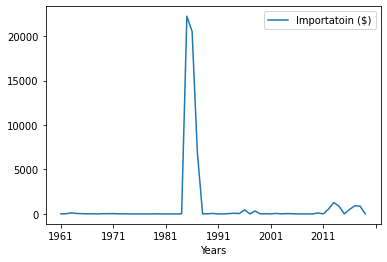

In [ ]:
last_for_years_importation.plot()


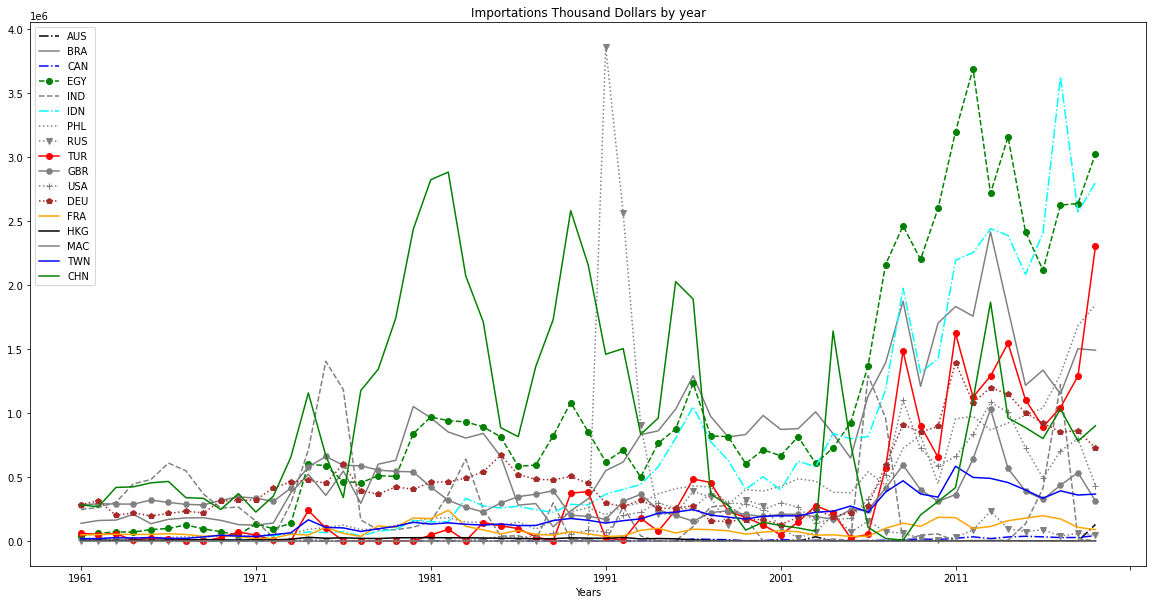

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))

df_countries_importation_iso3.plot.line(ax=ax, title="Importations Thousand Dollars by year", style=['-.','-','-.','--o','--','-.',':',':v','-o','-H',':+',':p'], color=['black','gray','blue','green','gray','cyan','gray','gray','red','gray','gray','brown','orange'])

fig.savefig(f"{path_to_charts}Importations Thousand Dollars by year.png",dpi=300)

SAVING

In [ ]:
path_analises_trigo = "/content/drive/MyDrive/Trigo_analises/notebooks/analises/"
path_to_limpos_trigo ='/content/drive/MyDrive/Trigo_analises/limpos/'

In [ ]:
tops_for_year_importation.to_csv(f"{path_analises_trigo}tops_for_year_importation.csv")
last_for_years_importation.to_csv(f"{path_analises_trigo}last_for_years_importation.csv")
df_countries_importation_iso3.to_csv(f"{path_to_limpos_trigo}paises_selecionados_importation.csv")